### Best platform for advirtisement
We are working for an e-learning compagny that offers courses on programming. 

Many courses are offered such as data science,game development... but the core of the company is web and mobile development.

If we were to inject money for some advertisement what market should we focus on.
the data set come from (freeCodeCamp's 2017) https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969

The dataset we are working on is already a merging between 2 dataset. see more at https://github.com/freeCodeCamp/2017-new-coder-survey

**goal**
- the goal of the project is to determine what market  would the best for us for the biggest ROI on our investment

**column of interest**:
- what sources do they used
- how much do they spend and who are the ones in our price range (country, age, sex......) those are our target for advertisement...
- ...so knowing where they go for learning and what do they watch /listen, basically **when it comes to coding where do they spend their time?** 
- what are the expectations of our target audiance (web dev but also data science games, we could investigate if there are differences between these sub-categories of target


questions fom the exercice:
- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

In [292]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('fivethirtyeight')

In [293]:
#read the dataset
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



There are issues with the type of data in 2 columns, we gonna fix that:

In [294]:
survey.columns[[17,62]]

Index(['CodeEventOther', 'JobInterestOther'], dtype='object')

In [295]:
survey['CodeEventOther'].value_counts()

No                                                           21
Ladies Learning Code                                          9
General Assembly                                              8
Bootcamp                                                      8
School                                                        8
Na                                                            6
Codebar                                                       5
No One                                                        5
GDG                                                           4
Hour Of Code                                                  3
College                                                       3
Google Developer Group                                        3
WordCamp                                                      3
Any                                                           3
Coding Bootcamp                                               3
Coding Dojo                             

In [296]:
#fixing the type of the data in col 17 and 62
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',
                     dtype={"CodeEventOther": object, "JobInterestOther": object}
                    )

In [297]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [298]:
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

#### Checking for Sample Representativity
The people who answered the survey, are they a good representation of our population of interest? 

In [299]:
print(survey['JobRoleInterest'].isnull().sum(), ' persons with no interests')

per_no_job_interest= survey['JobRoleInterest'].isnull().sum()/len(survey['JobRoleInterest'])*100
print('it represents', round(per_no_job_interest,2), '% of our sample')

11183  persons with no interests
it represents 61.53 % of our sample


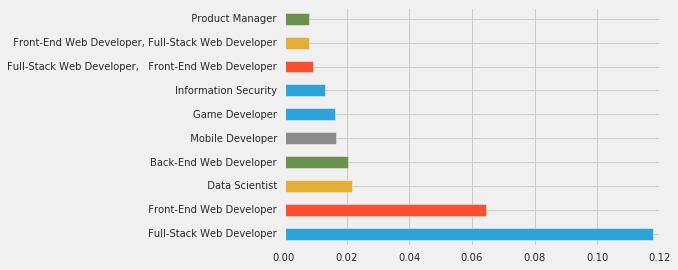

In [300]:
survey['JobRoleInterest'].value_counts(normalize=True).head(10).plot.barh()

- As we see below, the main categories of interest are well aligned with our course as the main categories of interest are related to Web development. 
- it makes sense as the survey is from a website teaching code for developement mainly 

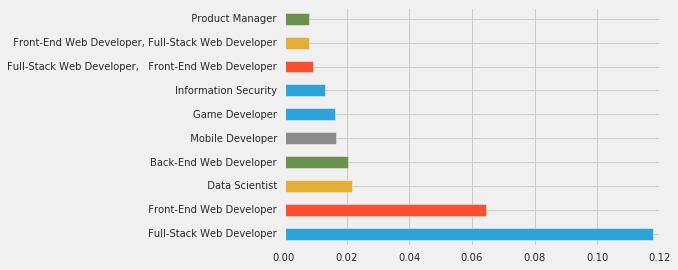

In [301]:
survey['JobRoleInterest'].value_counts(normalize=True).head(10).plot.barh()

##### How many people with multiple job interests?

In [302]:
#isolate the answer not null
job_interest_notnull = survey['JobRoleInterest'][survey['JobRoleInterest'].notnull()]

In [303]:
len(job_interest_notnull)

6992

In [304]:
count_multi_interest=0
count_one_interest=0
total = len(job_interest_notnull)
for i in job_interest_notnull:
    len_split=len(i.split(','))
    if len_split == 1:
        count_one_interest += 1
    if len_split > 1:
        count_multi_interest += 1

6992 persons in total has answered some job interests
2213 persons have only one job interest
4779 persons with at least 2 job interests


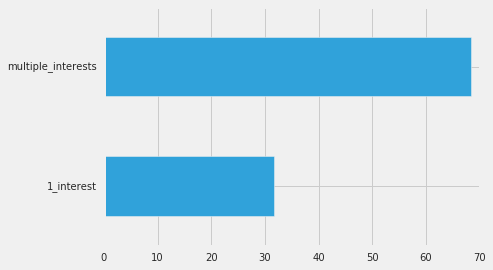

In [305]:
print(total,'persons in total has answered some job interests')
print(count_one_interest, 'persons have only one job interest')
print(count_multi_interest,'persons with at least 2 job interests')
len(job_interest_notnull)
pd.DataFrame(data=[[count_one_interest/total*100],[count_multi_interest/total*100]],
             index=['1_interest','multiple_interests']).plot.barh(legend=False)

- in the graph above, we see that within the person who answered some jobs interests have more than one so we need to take it into account. 

=> **let slit the multiple interest and redo the distribution of interest.**

In [306]:
job_interest_dict={}
for interests in job_interest_notnull:
    interest_splitted=interests.split(',')
    for string in interest_splitted:
        string = string.strip().lower()
        if string in job_interest_dict:
            job_interest_dict[string] += 1
        elif string not in job_interest_dict:
            job_interest_dict[string] = 1

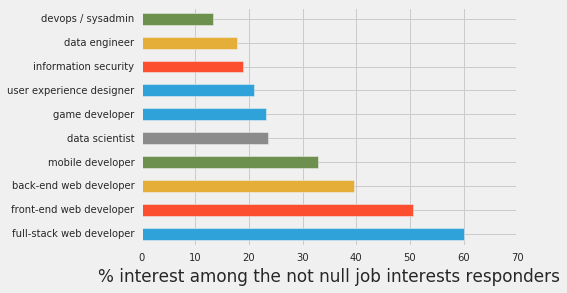

In [307]:
splitted_job_interests = pd.DataFrame.from_dict(job_interest_dict, orient='index').sort_values(0,ascending=False)
splitted_job_interests.columns = ['interest']
splitted_job_interests['interest_per'] = splitted_job_interests['interest'] / len(job_interest_notnull) *100

splitted_job_interests['interest_per'].head(10).plot.barh()
plt.xlabel('% interest among the not null job interests responders')

**small conclusion**
- the sample is well representative of our target audience as the 3 main are related to web developement, people would like to be full-stack, front-end or back-end at roughfly 60%, 50% and 40% respectively. but if we take all web interest into consideration there is **82%** of the not null responders that have an interest. 
- then in 4 there is like **33% of interest in mobile dev** and 25% in game development
- there is also 25% of interest for data scientist position, so the analyse of this sample would be also beneficiary for us in relation to our data science course.

In [308]:
#any interest in web
job_interest_notnull.str.contains('[Ww]eb').sum()/len(job_interest_notnull)*100

82.68020594965675

In [309]:
#any job interest relating to mobile
job_interest_notnull.str.contains('[Mm]obile').sum()/len(job_interest_notnull)*100

32.9662471395881

### New Coders, where are they and what densities
We would like to know where these new coders are living

In [310]:
#remove data from people who did not answer the job interest
data_with_interest= survey[survey['JobRoleInterest'].notnull()].copy()

In [311]:
absolute_count_countries= data_with_interest['CountryLive'].value_counts()
relative_count_countries=round(data_with_interest['CountryLive'].value_counts(normalize=True)*100,2)

potential_market = pd.DataFrame(data={'absolute_count':absolute_count_countries,
                                    'relative_count':relative_count_countries})

potential_market

,absolute_count,relative_count
United States of America,3125,45.70
India,528,7.72
United Kingdom,315,4.61
Canada,260,3.80
Poland,131,1.92
Brazil,129,1.89
Germany,125,1.83
Australia,112,1.64
Russia,102,1.49
Ukraine,89,1.30


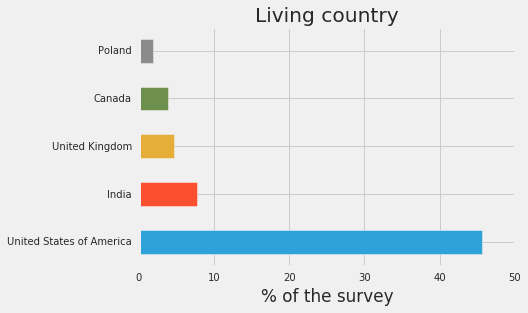

In [312]:
potential_market['relative_count'].head().plot.barh()
plt.title('Living country')
plt.xlabel('% of the survey')

- Based on these results: the 2 market to choose would be USA with 45% of new coders and India. (7%) 

- I would still recommand to dig more into the USA market to understand to know more our future customers it might be better to target only USA....
    - where do these coders spend their time learning ? 
    - we could have video ad on Youtube or regular ads on webpages or sponsor an ad for a podcast. 
    - Should we make our courses accessible on some platform such as coursera with a paying certificate? 
    
Advertising in high-density markets where most people are only willing to learn for free is extremely unlikely to be profitable for us. So where people who spend money, spend it??

*Usa customers:*
- 68 languages at home, 

In [313]:
#isolate coder from USA
coders_usa= data_with_interest[data_with_interest['CountryLive']=='United States of America'].copy()

        - to go deeper for the analysis of the USA market

###  Spending Money for Learning
as mentionned earlier, our target is the student ready to pay for learning not the students using only free tools. 
our company has courses in Englih for a monthly price of 59$ /month. 

=> We gonna focus our analysis on the 4 biggest countries as they are english speaking country (the 5th is Poland...)

In [314]:
#compute money per month.
#remove the 0 values to avoid issues when dividing 
data_with_interest['MonthsProgramming']=data_with_interest['MonthsProgramming'].replace(0,1)
data_with_interest['MonthsProgramming'].describe()

count    6633.000000
mean       13.681140
std        29.586196
min         1.000000
25%         2.000000
50%         6.000000
75%        15.000000
max       744.000000
Name: MonthsProgramming, dtype: float64

In [315]:
data_with_interest['MoneyForLearning'].describe()

count      6476.00000
mean        885.31223
std        4893.37377
min           0.00000
25%           0.00000
50%          10.00000
75%         200.00000
max      200000.00000
Name: MoneyForLearning, dtype: float64

In [316]:
#fee per month
data_with_interest['monthly_learning_fee'] = data_with_interest['MoneyForLearning'] / data_with_interest['MonthsProgramming']

In [317]:
print(data_with_interest['monthly_learning_fee'].describe())
print(data_with_interest['monthly_learning_fee'][data_with_interest['monthly_learning_fee']==0].count(), 
     'null values')

count     6317.000000
mean       177.468653
std       1563.115242
min          0.000000
25%          0.000000
50%          0.708333
75%         33.333333
max      80000.000000
Name: monthly_learning_fee, dtype: float64
3092 null values


- there are 3710 null values

In [318]:
data_with_interest['monthly_learning_fee'].isnull().sum()

675

In [319]:
#let's remove all the empty value from monthly_learning fee 
good_data= data_with_interest[data_with_interest['monthly_learning_fee'].notnull()]

In [320]:
good_data['monthly_learning_fee'].describe()

count     6317.000000
mean       177.468653
std       1563.115242
min          0.000000
25%          0.000000
50%          0.708333
75%         33.333333
max      80000.000000
Name: monthly_learning_fee, dtype: float64

In [321]:
#let's remove the rows with empty value in CountryLive 
good_data= good_data[good_data['CountryLive'].notnull()]

In [322]:
#to check if we did not remove too many data 
good_data['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

In [323]:
#compute the average monthly learning fee 
countries_mean = good_data.groupby('CountryLive').mean()
print('---mean---')
countries_mean['monthly_learning_fee'][['United States of America','India', 'United Kingdom','Canada']]

---mean---


CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: monthly_learning_fee, dtype: float64

The americans are the ones that put the max into monthly learning fees follwing by India, Canada and UK. 
It might be worth to see how many people are around our price tag

In [324]:
#check the std and median
countries_std = good_data.groupby('CountryLive').std(ddof=1)
print('---std---')
countries_std['monthly_learning_fee'][['United States of America','India', 'United Kingdom','Canada']]

---std---


CountryLive
United States of America    1940.245614
India                        692.960378
United Kingdom               162.311836
Canada                       441.014158
Name: monthly_learning_fee, dtype: float64

In [325]:
#check the std and median
countries_stats = good_data.groupby('CountryLive')['monthly_learning_fee'].agg(['mean','std','median'])
countries_stats.columns= ['mean_MonthlyFee','std_MontlyFee','median_MonthlyFee']
countries_stats.loc[['United States of America','India', 'United Kingdom','Canada']]


,mean_MonthlyFee,std_MontlyFee,median_MonthlyFee
CountryLive,,,
United States of America,227.997996,1940.245614,3.333333
India,135.100982,692.960378,0.000000
United Kingdom,45.534443,162.311836,0.000000
Canada,113.510961,441.014158,0.000000


In [326]:
countries_stats.loc[['United States of America','India', 'United Kingdom','Canada']]


,mean_MonthlyFee,std_MontlyFee,median_MonthlyFee
CountryLive,,,
United States of America,227.997996,1940.245614,3.333333
India,135.100982,692.960378,0.000000
United Kingdom,45.534443,162.311836,0.000000
Canada,113.510961,441.014158,0.000000


- There are some crazy standard deviation in USA for instance which might mean outliers :) 
- The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.


### Dealing with Extreme Outliers

In [327]:
import seaborn as sns

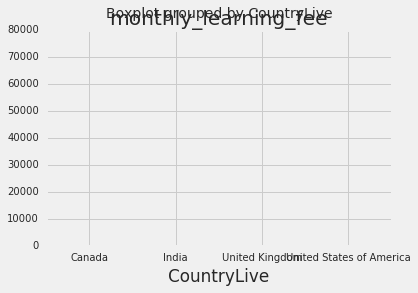

In [328]:
#box plot monthly fee for our 4 countries of interest
countries_interests= good_data[good_data['CountryLive'].str.contains(
            'United States of America|India|United Kingdom|Canada'
        )]
countries_interests.boxplot(column='monthly_learning_fee',by='CountryLive')

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



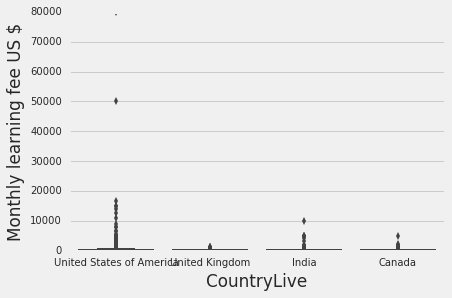

In [329]:
sns.boxplot(x='CountryLive',y='monthly_learning_fee',
           data=countries_interests)

plt.ylabel('Monthly learning fee US $')

we gonna remove the outliers, for instance evryting above 10K /month

In [330]:
countries_interests= countries_interests[countries_interests['monthly_learning_fee'] < 10000]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



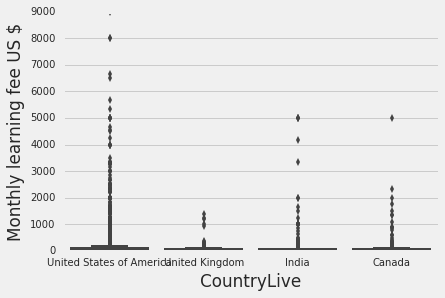

In [331]:
sns.boxplot(x='CountryLive',y='monthly_learning_fee',
           data=countries_interests)

plt.ylabel('Monthly learning fee US $')

In [332]:
#check avg std and median again
countries_interests.groupby('CountryLive')['monthly_learning_fee'].agg(['mean','std','median'])

,mean,std,median
CountryLive,,,
Canada,113.510961,441.014158,0.000000
India,113.748387,519.307886,0.000000
United Kingdom,45.534443,162.311836,0.000000
United States of America,155.459187,591.219645,3.333333


In [333]:
#check the indian outliers
india_outliers = countries_interests[(countries_interests['CountryLive']=='India') & 
                    (countries_interests['monthly_learning_fee'] > 2500)]

For the Indians outliers, none of them have done a bootcamp,  3 have less than 6 month programming experience, and 2 with 15 and 24 month have spent 50K and 100K respestively, it might be price for their tuition and not for programming learning so we should drop them. 

In [334]:
#drop by index
countries_interests = countries_interests.drop(india_outliers.index)

In [335]:
#USA outlier
usa_outliers = countries_interests[(countries_interests['CountryLive']=='United States of America') & 
                    (countries_interests['monthly_learning_fee'] > 3800)]
usa_outliers[['AttendedBootcamp','MonthsProgramming','monthly_learning_fee']].sort_values('monthly_learning_fee',ascending = False)

,AttendedBootcamp,MonthsProgramming,monthly_learning_fee
3184,1.0,1.0,9000.000000
718,1.0,1.0,8000.000000
9778,1.0,1.0,8000.000000
7505,1.0,3.0,6666.666667
1222,1.0,2.0,6500.000000
3145,1.0,3.0,5666.666667
13145,1.0,3.0,5333.333333
16211,1.0,2.0,5000.000000
8901,1.0,3.0,5000.000000
8202,1.0,3.0,5000.000000


- For the USA outlier, some of the persons did not go to a bootcamp but still have spend a big amount of money, which does not explain why. better to remove it to avoid bias
- for the one who attended a bootcamp, it explains the high monthly learning fee but we gonna remove the one with 3month or less programming experience. 



In [336]:
#remove the usa outliers who did not to bootcamp 
usa_outliers[usa_outliers['AttendedBootcamp']==0][['AttendedBootcamp','MonthsProgramming','monthly_learning_fee']].sort_values('monthly_learning_fee',ascending = False)

countries_interests= countries_interests.drop(usa_outliers[usa_outliers['AttendedBootcamp']==0].index)

In [337]:
#remove usa outlier who went to bootcamp but has 3months max programming experience
usa_outliers[(usa_outliers['MonthsProgramming'] <=3) & 
             usa_outliers['AttendedBootcamp']==1][['AttendedBootcamp','MonthsProgramming','monthly_learning_fee']].sort_values('monthly_learning_fee',ascending = False)

countries_interests = countries_interests.drop(usa_outliers[(usa_outliers['MonthsProgramming'] <=3) & 
                                                             (usa_outliers['AttendedBootcamp']== 1)].index)

In [338]:
#explore Canada oulier 
canada_outlier = countries_interests[(countries_interests['CountryLive']=='Canada')  & 
                    (countries_interests['monthly_learning_fee'] > 3000)][['AttendedBootcamp','MonthsProgramming','monthly_learning_fee']]
canada_outlier

,AttendedBootcamp,MonthsProgramming,monthly_learning_fee
13659,1.0,2.0,5000.0


Similar to USA outliers, big amount of money spends and only a few month of programming, meaning that it is probably the price of the bootcamp. we gonna do like such kind of USA outliers, we drop it.

In [339]:
countries_interests = countries_interests.drop(canada_outlier.index)

In [340]:
#check avg std and median again
countries_interests.groupby('CountryLive')['monthly_learning_fee'].agg(['mean','std','median'])

,mean,std,median
CountryLive,,,
Canada,93.065400,307.512802,0.0
India,65.758763,233.452738,0.0
United Kingdom,45.534443,162.311836,0.0
United States of America,121.976191,395.889646,3.0


The numbers for india seem more reasonable but why the UK are so low average? might be something to investigate. 

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



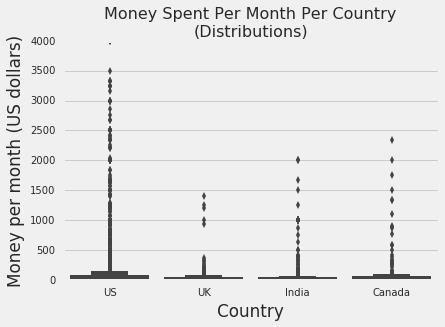

In [341]:
sns.boxplot(x='CountryLive',y='monthly_learning_fee',
           data=countries_interests)

plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

In [342]:
countries_interests['CountryLive'].value_counts(normalize=True)*100

United States of America    74.884080
India                       11.772282
United Kingdom               7.187017
Canada                       6.156620
Name: CountryLive, dtype: float64

### Conclusion
Based on the results we obtained so far the 2 markets I would advise to choose is:
- USA
- India, despite Canada having better average value, the potential market is only a bit more than half the market of India and our price is in the spot of the average price (65$)


###### Small test by isolated only the student paying something for learning (>0)

In [343]:
paying_students = countries_interests[countries_interests['monthly_learning_fee'] > 0]

In [344]:
paying_students['CountryLive'].value_counts(normalize=True)*100

United States of America    78.164868
India                        9.568204
United Kingdom               6.722277
Canada                       5.544652
Name: CountryLive, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



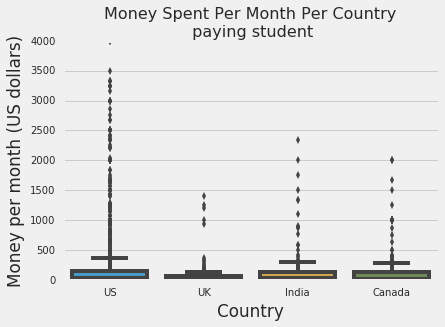

In [345]:
sns.boxplot(x='CountryLive',y='monthly_learning_fee',
           data=paying_students)

plt.title('Money Spent Per Month Per Country\n paying student',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

In [346]:
paying_students.groupby('CountryLive')['monthly_learning_fee'].agg(['mean','std','median'])

,mean,std,median
CountryLive,,,
Canada,196.837439,424.664765,25.000000
India,154.111562,338.256033,20.000000
United Kingdom,92.730727,222.359671,20.833333
United States of America,222.589321,513.497137,33.333333


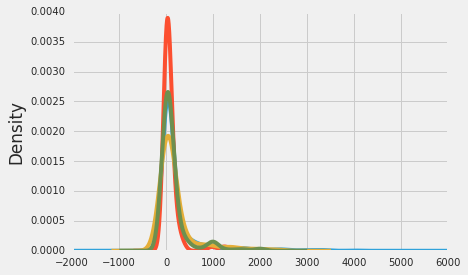

In [362]:
for country in paying_students['CountryLive'].unique():
    paying_students[paying_students['CountryLive']==country]['monthly_learning_fee'].plot.kde()

In [364]:
#describe the monthly fee per country
paying_students.groupby('CountryLive')['monthly_learning_fee'].describe().T

CountryLive,Canada,India,United Kingdom,United States of America
count,113.000000,195.000000,137.000000,1593.000000
mean,196.837439,154.111562,92.730727,222.589321
std,424.664765,338.256033,222.359671,513.497137
min,0.416667,0.138889,0.050000,0.033333
25%,8.333333,5.196429,8.333333,10.000000
50%,25.000000,20.000000,20.833333,33.333333
75%,125.000000,122.500000,66.666667,150.000000
max,2337.166667,2000.000000,1400.000000,4000.000000


### Conclusion bis

if we take the info from the blocs checking only the students paying:
- 78% of the new coders paying are in USA
- but our price of 59$/month is really low compare to the average people in Canada and USA and India are ready to put.  
    - Are people ready to buy something 3 times cheapers that the competition (the std dev is really high also so...) ?
    - How do we vouch for the quality?
- our price is closer to the  UK average, so could we not add some more value to our offer by adding portefolio guidance, webinar, community ... so we could increase our price  and be in the range of the average amount people are ready to put? 


Maybe we could split the budget:
- sure 70% of the budget for USA 
- 10% for each of the other and we see which one answer best to the advertisement


- we should get in touch with the marketing team and discuss with them
- other factors that could influence our pool of answers? the public from the freecode survey? their follower on Medium? ..... these criteria could help us to make a better choice. 

### Going further
-Finding other criteria for choosing the best market.
-Analyzing other data sets:

- freeCodeCamp's 2016 New Coders Survey https://github.com/freeCodeCamp/2016-new-coder-survey
- Stack Overflow 2018 Developer Survey https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey
- style guideline: https://www.dataquest.io/blog/data-science-project-style-guide